# Exploratory Data Analysis on FIFA 18 Players Data using Python/MySQL/Pandas/Matplotlib/Seaborn/Plotly

>##### <b>Description of Project</b>
>
>This project is an attempt at a general exploration of a FIFA 18 players dataset to look for possible trends and abnormalities of the FIFA 18 player population. It explores the distribution of players between countries and clubs, their stats, as well as their values and wages.

>##### <b>Description of Dataset</b>
>
>Dataset Link: https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset/versions/2
>- Data was scrapped from https://sofifa.com to contain all players present in FIFA 18, including their values, wages, nationalities, ages, clubs, and stats.

>##### <b>Topics Explored</b>
>
>- What are the top 20 countries with the most players in FIFA 18?
>- What are the top 10 countries with the highest average player values?
>- What is the average wage of Goal Keepers, Forwards, Midfielders, and Defenders?
>- On average, how do Forward players differ from Defenders in terms of Finishing, Dribbling, Ball >Control, Long Passing, Marking, and Standing Tackle?
>- Distribution of players in the top 10 clubs of Ivory Coast
>- Distribution of clubs in the top 5 countries with the most FIFA 18 players
>- How player Value corresponds to Overall stat in the top 6 countries with the most FIFA 18 players
>- How player Value corresponds to player Age in the top 6 countries with the most FIFA 18 players
>- How player Value corresponds to Dribbling and Standing Tackle stat for Foward players (Finishing > 70)

>##### <b>Methods</b>
>
>- Data read from csv and stored into a Pandas DataFrame
>- Data cleaning and data manipulation using Pandas
>- Data selecting and grouping using MySQL
>- Statistical analysis and data visualisation using Matplotlib, Seaborn, and Plotly

***

### <b>1. Set Up</b>
##### Import Libraries

In [152]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import calendar
import re
from math import pi

##### Connect to MySQL Database

In [153]:
connection = mysql.connector.connect(
    host='localhost',
    user='root',    # please use the correct user name
    password='10RelationalDatabasesAreVeryUseful!',
    database='employees',
    auth_plugin='mysql_native_password'
)
if connection.is_connected():
    db_Info = connection.get_server_info()
    # print("Connected to MySQL Server version ", db_Info, '\n')

cursor = connection.cursor()

##### Declare Functions

In [154]:
def execute_query(query):
    '''
    Takes a single SQL query string, executes, and returns SQL output as a list of rows
    '''

    # Execute query and return all rows of output
    cursor.execute(query)
    return cursor.fetchall()


def convert_to_df(data, headers):
    '''
    Takes SQL query output's list of rows (data) and a list of column names (headers) as argument
    Returns a pandas DataFrame object

    Note: The number of columns in data and headers must be equal
    '''

    # Create and return DataFrame
    df = pd.DataFrame(data, columns=headers)
    return df


def add_labels(x, y):
    '''
    Adds y labels to plot
    '''

    for i in range(len(x)):
        plt.text(i, float(y[i]) * 1.01, f'{y[i]:,}')


def values_to_int(values):
    '''
    Takes a list of non int-type digits and convert to a list of int digits
    '''
    return list(map(int, values))

***

### <b>2. Data Ingestion, Cleaning, Manipulation</b>

##### <b>2.1 Data Ingestion (Q5)</b>

- Read csv file containing FIFA18 player data and import into a Pandas DataFrame

In [155]:
# Import DataFrame data from csv file and display 10 samples
player_data_df = pd.read_csv (r'CompleteDataset.csv')
player_data_df.sample(10)

C:\Users\gohyu\AppData\Local\Temp\ipykernel_8448\1673512989.py:2: DtypeWarning:

Columns (23,36) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
11320,11320,T. Majrashi,26,https://cdn.sofifa.org/48/18/players/222566.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,64,64,Al Fayha,https://cdn.sofifa.org/24/18/teams/113057.png,...,60,64,59,48,78,67,56,63,49,46
10134,10134,Gálvez,24,https://cdn.sofifa.org/48/18/players/205639.png,Spain,https://cdn.sofifa.org/flags/45.png,65,72,Albacete Balompié,https://cdn.sofifa.org/24/18/teams/1854.png,...,59,67,64,57,39,71,65,90,54,40
901,901,S. Dann,30,https://cdn.sofifa.org/48/18/players/157665.png,England,https://cdn.sofifa.org/flags/14.png,78,78,Crystal Palace,https://cdn.sofifa.org/24/18/teams/1799.png,...,77,63,52,78,45,73,78,82,55,29
3079,3079,I. Diomandé,24,https://cdn.sofifa.org/48/18/players/203435.png,Ivory Coast,https://cdn.sofifa.org/flags/108.png,73,78,SM Caen,https://cdn.sofifa.org/24/18/teams/210.png,...,70,75,75,70,70,74,74,75,58,43
13734,13734,R. Singh,27,https://cdn.sofifa.org/48/18/players/212502.png,India,https://cdn.sofifa.org/flags/159.png,61,61,NaN,https://cdn.sofifa.org/flags/159.png,...,57,48,60,15,57,66,16,77,47,47
432,432,J. Guilavogui,26,https://cdn.sofifa.org/48/18/players/198118.png,France,https://cdn.sofifa.org/flags/18.png,80,82,VfL Wolfsburg,https://cdn.sofifa.org/24/18/teams/175.png,...,79,77,78,86,73,77,84,82,65,49
10451,10451,E. Güral,28,https://cdn.sofifa.org/48/18/players/223123.png,Turkey,https://cdn.sofifa.org/flags/48.png,65,65,Antalyaspor,https://cdn.sofifa.org/24/18/teams/741.png,...,65,66,79,21,60,64,24,78,58,70
12620,12620,Danisco Fachini,33,https://cdn.sofifa.org/48/18/players/230336.png,Brazil,https://cdn.sofifa.org/flags/54.png,63,63,Atlético Clube Goianiense,https://cdn.sofifa.org/24/18/teams/112119.png,...,55,46,71,61,68,65,66,72,39,57
8911,8911,N. Adler,32,https://cdn.sofifa.org/48/18/players/156453.png,Germany,https://cdn.sofifa.org/flags/21.png,66,66,FC Erzgebirge Aue,https://cdn.sofifa.org/24/18/teams/506.png,...,63,62,69,23,81,69,27,65,56,55
14150,14150,J. Ngoy,19,https://cdn.sofifa.org/48/18/players/236464.png,Belgium,https://cdn.sofifa.org/flags/7.png,61,74,Stoke City,https://cdn.sofifa.org/24/18/teams/1806.png,...,55,51,56,22,78,62,18,73,54,44


Not all 48 columns shown, use a for loop to display all columns in dataset for 3 random players

In [156]:
count = 0
for row in player_data_df.sample(10).values:
    for i in range(len(row)):
        print(f"<{player_data_df.columns[i]}: {row[i]}>", end='')

        if i != len(row) - 1:
            print('', end=', ')
    
    print('''
----------''')
    count += 1
    if count == 3:
        break

<Unnamed: 0: 11926>, <Name: D. Vega>, <Age: 24>, <Photo: https://cdn.sofifa.org/48/18/players/233467.png>, <Nationality: Costa Rica>, <Flag: https://cdn.sofifa.org/flags/72.png>, <Overall: 64>, <Potential: 67>, <Club: SK Brann>, <Club Logo: https://cdn.sofifa.org/24/18/teams/919.png>, <Value: €575K>, <Wage: €2K>, <Special: 1587>, <Acceleration: 82>, <Aggression: 45>, <Agility: 73>, <Balance: 70>, <Ball control: 69>, <Composure: 57>, <Crossing: 55>, <Curve: 56>, <Dribbling: 67>, <Finishing: 57>, <Free kick accuracy: 42>, <GK diving: 9>, <GK handling: 7>, <GK kicking: 13>, <GK positioning: 14>, <GK reflexes: 11>, <Heading accuracy: 34>, <ID: 233467>, <Interceptions: 37>, <Jumping: 40>, <Long passing: 48>, <Long shots: 57>, <Marking: 38>, <Penalties: 58>, <Positioning: 64>, <Reactions: 52>, <Short passing: 62>, <Shot power: 68>, <Sliding tackle: 23>, <Sprint speed: 79>, <Stamina: 58>, <Standing tackle: 39>, <Strength: 51>, <Vision: 57>, <Volleys: 52>
----------
<Unnamed: 0: 15768>, <Name:

##### <b>2.2 Data Cleaning and Manipulation (Q6)</b>

>- <b>Redundant columns</b>
>    - won't be used for this study and will be dropped from the DataFrame
>        - Photo<br>
>        - Flag<br>
>        - Club Logo<br>
>    <span style="color:#516091;background-color:#EEF3AD">These columns contain photo links</span>

>- <b>Empty/NaN cells</b>
>    - Text columns (e.g. Club) will be filled with text
>    - Numeric columns (e.g. stat columns) will be filled with 0

>- <b>\+ and - signs in stat columns</b>
>    - According to dataset information, these don't mean addition or subtraction, but increase or decrease
>    from previous values
>    - +/- signs removed together with the following digits

>- <b>Value and Wage columns</b>
>    - Currency symbol to be removed
>    - Million and thousand formatting to be removed

>- <b>Stat datatypes are objects</b>
>    - Convert all digit column data types to int

>- <b>Duplicate rows</b>
>    - Several duplicate rows found in the dataset and need to be removed

Drop redundant columns

In [157]:
player_data_df.drop(['Photo', 'Flag', 'Club Logo', 'Unnamed: 0'], axis=1, inplace=True)

Look for missing values

In [158]:
player_data_df.isna().sum().values

array([  0,   0,   0,   0,   0, 248,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype=int64)

In [159]:
player_data_df = player_data_df.fillna('No Club')

Search for columns that contain + and - values and strip them away

In [160]:
# Search for columns with + and - and store column names in cols list
cols = []

for i in range(len(player_data_df.columns)):
    column_name = player_data_df.columns[i]
    
    if player_data_df.dtypes.values[i] != 'int64':
        masked_row_count = player_data_df[player_data_df[column_name].str.contains('\+', na=False)].shape[0]
        if masked_row_count != 0:
            cols.append(column_name)

# Iterate through each col in cols and remove the +/- strings
for col in cols:
    player_data_df[col] = player_data_df[col].str.replace("(\+|\-).+", "", regex=True)

Search for columns that contain the string 'nan' and replace with '0'

In [161]:
# Check how many values in DataFrame with 'na' or 'nan'
na_counts = {'na': 0, 'nan': 0}

for i in range(len(player_data_df.columns)):
    column_name = player_data_df.columns[i]
    
    if player_data_df.dtypes.values[i] != 'int64':
        for value in player_data_df[column_name].values:
            if str(value).lower() == 'na':
                na_counts['na'] += 1
            elif str(value).lower() == 'nan':
                na_counts['nan'] += 1

print(na_counts)

{'na': 0, 'nan': 3194}


In [162]:
# Search for columns that contain the value 'nan' and store in nan_cols list
nan_cols = []

for i in range(2, len(player_data_df.columns)):
    column_name = player_data_df.columns[i]

    nan_col = False
    if player_data_df.dtypes.values[i] != 'int64':
        for value in player_data_df[column_name].values:
            if str(value).lower() == 'nan':
                nan_col = True
        if nan_col:
            nan_cols.append(column_name)

# Iterate through nan_cols list and replace 'nan' values with '0'
for col in nan_cols:
    for i in range(len(player_data_df[col].values)):
        if str(player_data_df[col].values[i]).lower() == 'nan':
            player_data_df.at[i, col] = '0'

In [163]:
# Check how many values in DataFrame with 'na' or 'nan'
na_counts = {'na': 0, 'nan': 0}

for i in range(len(player_data_df.columns)):
    column_name = player_data_df.columns[i]
    
    if player_data_df.dtypes.values[i] != 'int64':
        for value in player_data_df[column_name].values:
            if str(value).lower() == 'na':
                na_counts['na'] += 1
            elif str(value).lower() == 'nan':
                na_counts['nan'] += 1

print(na_counts)

{'na': 0, 'nan': 0}


Format Value and Wage columns into full digits

In [164]:
player_data_df[['Value', 'Wage']]

,Value,Wage
0,€95.5M,€565K
1,€105M,€565K
2,€123M,€280K
3,€97M,€510K
4,€61M,€230K
...,...,...
17976,€50K,€1K
17977,€0,€1K
17978,€60K,€1K
17979,€60K,€1K


In [165]:
# Remove the first character that's not a digit in Value and Wage columns
player_data_df['Value'] = player_data_df['Value'].str.replace("^\D", "", regex=True)
player_data_df['Wage'] = player_data_df['Wage'].str.replace("^\D", "", regex=True)

# Convert 'M' to '000000' and 'K' to '000'
player_data_df['Value'] = player_data_df['Value'].str.replace("m|M$", "000000", regex=True)
player_data_df['Value'] = player_data_df['Value'].str.replace("k|K$", "000", regex=True)
player_data_df['Wage'] = player_data_df['Wage'].str.replace("m|M$", "000000", regex=True)
player_data_df['Wage'] = player_data_df['Wage'].str.replace("k|K$", "000", regex=True)

# Remove decimal point if any, and remove a '0' if there was a decimal point
for col in ('Value', 'Wage'):
    for i in range(len(player_data_df[col].values)):
        if '.' in str(player_data_df[col].values[i]):
            new_value = ''.join(player_data_df[col].values[i].split('.'))[:-1]
            player_data_df.at[i, col] = new_value

In [166]:
player_data_df[['Value', 'Wage']]

,Value,Wage
0,95500000,565000
1,105000000,565000
2,123000000,280000
3,97000000,510000
4,61000000,230000
...,...,...
17976,50000,1000
17977,0,1000
17978,60000,1000
17979,60000,1000


Now that all symbols removed, look for all columns that only contain digits and convert them from object to int

In [167]:
# Store all columns that only contain digits
numeric_cols = []

for i in range(len(player_data_df.columns)):
    column_name = player_data_df.columns[i]

    all_numeric = True
    if player_data_df.dtypes.values[i] != 'int64':
        for bool in player_data_df[column_name].str.isnumeric():
            if not bool:
                all_numeric = False
        
        if all_numeric:
            numeric_cols.append(column_name)

# Convert columns to int64 datatype
player_data_df = player_data_df.astype({col: 'int64' for col in numeric_cols})

# Check that all numeric columns are now int64
for i in range(len(player_data_df.columns)):
    print(f"{player_data_df.columns[i]}: {player_data_df.dtypes[i]}", end='')

    if i != len(player_data_df.columns) - 1:
        print('', end=', ')
print()

Name: object, Age: int64, Nationality: object, Overall: int64, Potential: int64, Club: object, Value: int64, Wage: int64, Special: int64, Acceleration: int64, Aggression: int64, Agility: int64, Balance: int64, Ball control: int64, Composure: int64, Crossing: int64, Curve: int64, Dribbling: int64, Finishing: int64, Free kick accuracy: int64, GK diving: int64, GK handling: int64, GK kicking: int64, GK positioning: int64, GK reflexes: int64, Heading accuracy: int64, ID: int64, Interceptions: int64, Jumping: int64, Long passing: int64, Long shots: int64, Marking: int64, Penalties: int64, Positioning: int64, Reactions: int64, Short passing: int64, Shot power: int64, Sliding tackle: int64, Sprint speed: int64, Stamina: int64, Standing tackle: int64, Strength: int64, Vision: int64, Volleys: int64


Drop duplicate rows and save clean DataFrame

In [168]:
player_clean_df = player_data_df.drop_duplicates()
player_clean_df.sample(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
12362,N. Garmendia,19,Spain,63,76,Udinese,700000,3000,1588,58,...,63,58,64,48,67,40,43,47,62,53
7008,D. Lazić,22,Serbia,68,77,Alanyaspor,1200000,7000,1534,65,...,60,58,40,68,63,68,71,70,47,27
4880,J. Rodríguez,37,Mexico,70,70,Monarcas Morelia,240000,10000,1890,42,...,75,74,76,57,34,65,67,66,73,68
15253,J. Sotirio,21,Australia,59,68,Western Sydney Wanderers,240000,1000,1504,79,...,53,54,49,23,86,63,28,65,58,36
13551,A. Al Sdairy,25,Saudi Arabia,62,66,Al Shabab,280000,4000,1095,41,...,56,24,23,13,53,26,18,59,62,15
14983,A. Al Suwat,22,Saudi Arabia,60,68,Al Taawoun,300000,3000,1534,61,...,45,65,62,54,66,61,53,60,60,35
6366,F. Bolzoni,28,Italy,69,69,La Spezia,850000,3000,1838,53,...,67,70,71,66,54,72,68,74,63,59
9200,R. Eckardt,27,Germany,66,66,FC Carl Zeiss Jena,675000,1000,1660,71,...,61,69,57,36,64,71,31,58,67,49
1686,Josué,26,Portugal,75,75,Osmanlıspor,7000000,19000,2012,66,...,73,75,82,59,70,72,53,61,76,67
14895,B. Morris,21,England,60,72,Shrewsbury,375000,1000,1581,72,...,52,65,58,57,68,67,61,66,59,30


Store DataFrame into MySQL DB for querying

In [169]:
# Store column names and corresponding datatype into a dictionary
# To be used in a loop later to generate CREATE TABLE query
col_dtypes = {}

for i in range(len(player_clean_df.columns.values)):
    key = '_'.join(player_clean_df.columns.values[i].split(' '))
    col_dtypes[key] = str(player_clean_df.dtypes.values[i])

for k, v in col_dtypes.items():
    if v == 'object':
        col_dtypes[k] = 'text'
    elif v == 'int64':
        col_dtypes[k] = 'int'

# Drop player_df table in MySQL if exists
execute_query('DROP TABLE IF EXISTS player_df')

# Generate CREATE TABLE query and execute
query = f"CREATE TABLE player_df ({', '.join([' '.join([k,v]) for k,v in col_dtypes.items()])})"
execute_query(query)

# Create list of columns for insertion
cols = "`,`".join(col_dtypes.keys())

# Insert DataFrame records row by row
for i,row in player_clean_df.iterrows():
    sql = "INSERT INTO `player_df` (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s)"
    cursor.execute(sql, tuple(row))

    # Commit to save changes
    connection.commit()

***

### <b>3. Exploration</b>

##### <b>3.1 Statistical Analysis (Q7)</b>

>Questions explored:
>- What are the top 20 countries with the most players in FIFA 18?
>- What are the top 10 countries with the highest average player values?
>- What is the average wage of Goal Keepers, Forwards, Midfielders, and Defenders?
>- On average, how do Forward players differ from Defenders in terms of Finishing, Dribbling, Ball >Control, Long Passing, Marking, and Standing Tackle?

(Q7.1) What are the top 20 countries with the most players in FIFA 18?


C:\Users\gohyu\AppData\Local\Temp\ipykernel_8448\1168559649.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



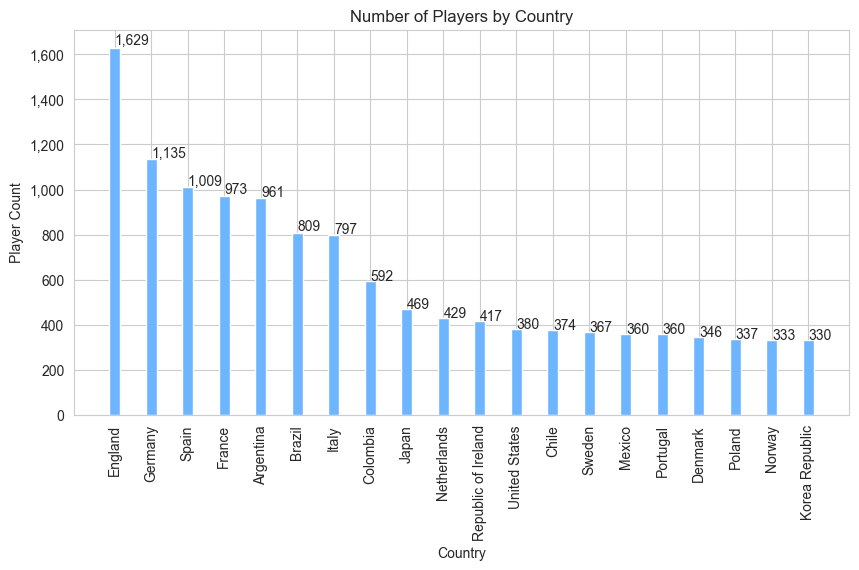

In [170]:
# Create DataFrame of countries and player counts from that country
# from the top 20 highest player count countries
data = execute_query('SELECT Nationality, COUNT(ID) FROM player_df GROUP BY Nationality ORDER BY COUNT(*) DESC LIMIT 20;')
df = convert_to_df(data, ('Country', 'Player Count'))
df['Player Count'] = values_to_int(df['Player Count'])

# Create bars
height = df['Player Count']
bars = df['Country']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, width=0.3, color='#6EB5FF')
plt.rcParams["figure.figsize"] = (10,5)

# Create title
plt.title("Number of Players by Country")

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Add labels
add_labels(y_pos, height)

# Add axis labels
plt.xlabel("Country")
plt.ylabel("Player Count")
plt.xticks(rotation=90)

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Display plot
plt.show()

>Observations:
>- England appears to have the highest number of players in FIFA 18
>- 12 out of the 20 countries are European countries

How does the top 6 countries compare with the rest of the world?

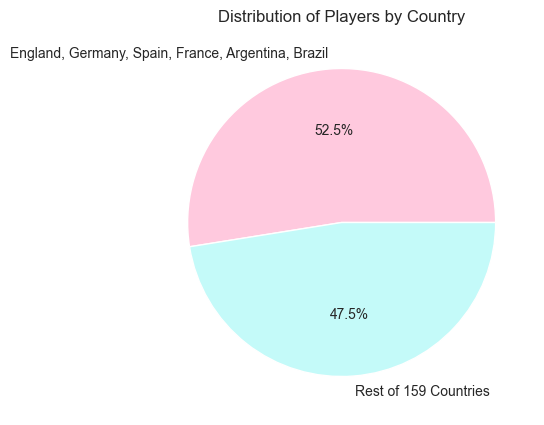

In [171]:
# Create a DataFrame that stores player counts from the top 6 countries
first_6 = df.loc[df['Country'].isin(df['Country'].values[:6])]['Player Count'].sum()

# Create a DataFrame that stores player counts from the rest of the 159 countries
rest_of_world = df.loc[df['Country'].isin(df['Country'].values[:6]) == False]['Player Count'].sum()

# Declare plot
fig, ax = plt.subplots()

# Plot pieplot
ax.pie((first_6, rest_of_world), labels=('England, Germany, Spain, France, Argentina, Brazil', 'Rest of 159 Countries'), autopct='%.1f%%')

# Set title
ax.set_title('Distribution of Players by Country')

# Dislpay plot
plt.show()

>Observations:
>- Interestingly, the top 6 countries with the highest number of FIFA 18 players have more players than the rest of the 159 countries combined

(Q7.2) What are the top 10 countries with the highest average player values?

C:\Users\gohyu\AppData\Local\Temp\ipykernel_8448\4112251599.py:31: UserWarning:

FixedFormatter should only be used together with FixedLocator



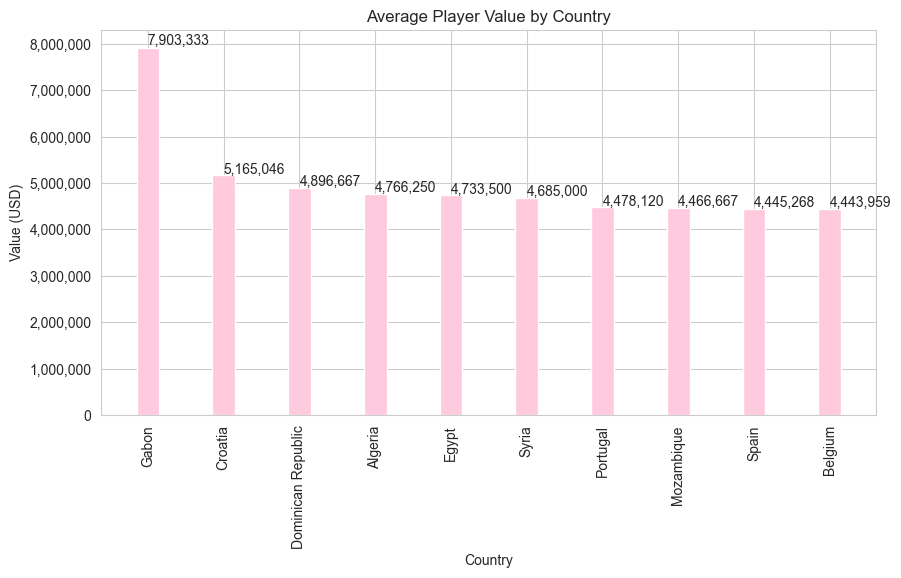

In [172]:
# Create DataFrame of country names and average player values
# of the top 10 countries with highest average player values
query = "SELECT Nationality, ROUND(AVG(Value)) FROM player_df WHERE Value != 0 GROUP BY Nationality ORDER BY AVG(Value) DESC LIMIT 10;"
data = execute_query(query)
df = convert_to_df(data, ('Country', 'Average Value'))
df['Average Value'] = values_to_int(df['Average Value'])

# Create bars
height = df['Average Value']
bars = df['Country']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, width=0.3, color='#FFC9DE')
plt.rcParams["figure.figsize"] = (10,5)

# Create title
plt.title("Average Player Value by Country")

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Add labels
add_labels(y_pos, height)

# Add axis labels
plt.xlabel("Country")
plt.ylabel("Value (USD)")
plt.xticks(rotation=90)

# After plotting the data, format labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Display plot
plt.show()

>Observations:
>- Gabon, a country in Central Africa appears to have the highest average player value in FIFA 18 of 7.9M
>- This is significantly higher than the rest of the countries, especially countries like England and Germany,<br>
>which don't even appear in this plot despite having the 2 highest number of FIFA 18 players
>- This could be due to the fact that most players aren't highly valued, with data skewed towards the highly valued outliers,<br>
> whereas the few players that are from Gabon are highly valued

8 out of all 12 players from Gabon are valued above 1M, the top 3 are:
>P. Aubameyang - 61M<br>
>M. Lemina - 12M<br>
>D. Ndong - 8M<br>

(Q7.3) Compare Distribution of player values between Gabon and Croatia, the next highest average player value

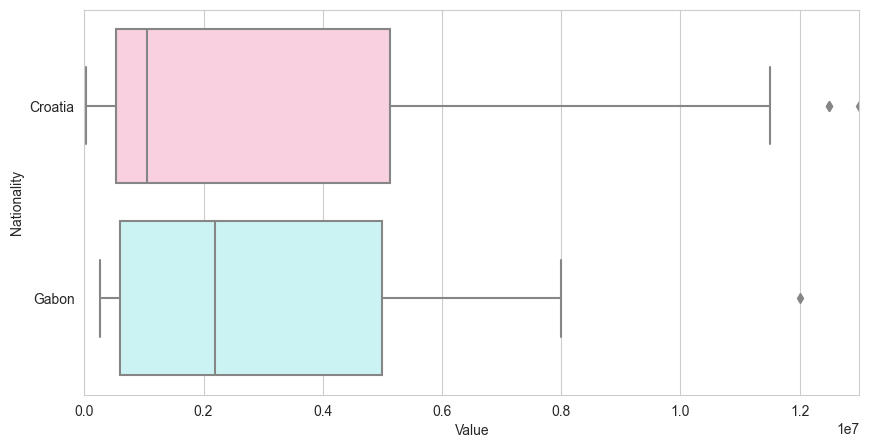

In [173]:
# Create DataFrame of player values of players from Gabon and Croatia
data = execute_query("SELECT Nationality, Value FROM player_df WHERE Nationality = 'Gabon' AND Value > 0 UNION ALL SELECT Nationality, Value FROM player_df WHERE Nationality = 'Croatia' AND Value > 0 ORDER BY Nationality;")
df = convert_to_df(data, ['Nationality', 'Value'])

# Declare plot
sns.set_style("whitegrid")
sns.set_palette(['#FFC9DE', '#C4FAF9'])

# Plot boxplot
sns.boxplot(y = 'Nationality', x = 'Value', data = df)

# Set x axis limit
plt.xlim(0, 13000000)

# Display plot
plt.show()

>Observations:
>- As expected, the lowest valued player from Croatia is significantly lower than Gabon's
>- Furthermore, Croatia's 50th percentile player value is less than half of that of Gabon's
>- This means that the vast majority of players from Croatia are valued below Gabon's 50th percentile

(Q7.4) What is the average wage of Goal Keepers, Forwards, Midfielders, and Defenders?

>Assumptions:
>- To determine what position a player is likely good at, a few key stats were identified for each position
>   - Goal Keepers - GK_handling
>   - Forward Players - Finishing
>   - Midfielders - Long Passing
>   - Defenders - Standing Tackling
>- As long as a player has above 70 for any of these stats, they're considered to be able to play well in the corresponding positions
>   - A Forward player is expected to have their Finishing stat > 70

This is a simplified method of classifying players by their positions and more stats could be considered for more accurate classification

C:\Users\gohyu\AppData\Local\Temp\ipykernel_8448\3496071645.py:39: UserWarning:

FixedFormatter should only be used together with FixedLocator



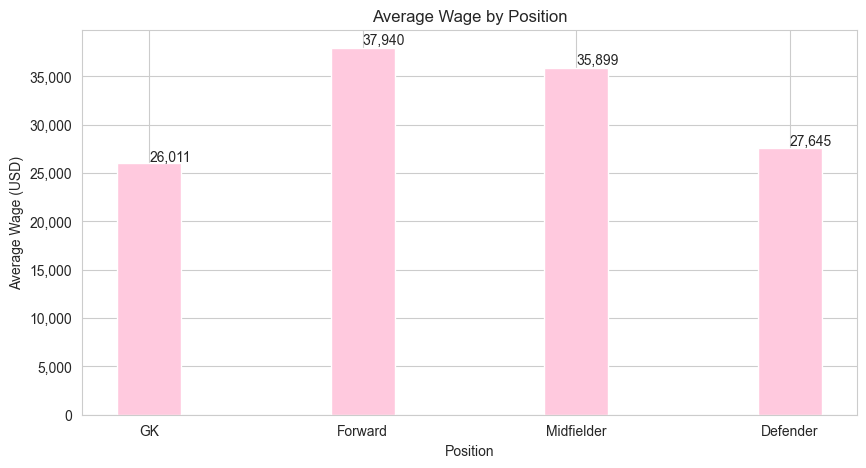

In [174]:
# Declare key stat used to determine player position
# If player has key stat above 70, they're determined
# to be able to play well in the corresponding position
position_stats = {'GK': 'Gk_handling', 'Forward': 'Finishing', 'Midfielder': 'Long_passing', 'Defender': 'Standing_tackle'}

# Query for the average wage of players with key stat above 70
# and store average wage in corresponding position
position_wages = []

for key in position_stats.keys():
    query = f"SELECT ROUND(AVG(Wage)) FROM player_df WHERE {position_stats[key]} > 70;"
    wage = int(execute_query(query)[0][0])
    position_wages.append([key, wage])

df = pd.DataFrame(position_wages, columns=['Position', 'Average Wage'])

# Create bars
height = df['Average Wage']
bars = df['Position']
y_pos = np.arange(len(bars))
plt.bar(bars, height, width=0.3, color='#FFC9DE')
plt.rcParams["figure.figsize"] = (10,5)

# Create title
plt.title("Average Wage by Position")

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Add axis labels
plt.xlabel("Position")
plt.ylabel("Average Wage (USD)")

# Add labels
add_labels(y_pos, height)

# After plotting the data, format labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Display plot
plt.show()

>Observations:
>- It appears that Forward players have the highest average Wage, followed closely by Midfielders, then Defenders, and finally Goal Keepers with the lowest average Wage

(Q7.5) On average, how do Forward players differ from Defenders in these stats?<br>
> Stats of Interest:
>- Finishing
>- Dribbling
>- Ball Control
>- Long Passing
>- Marking
>- Standing Tackle

> Assumptions:
>- This analysis uses the same method of classying a Forward player (Finishing > 70) and a Defender (Standing Tackle > 70)

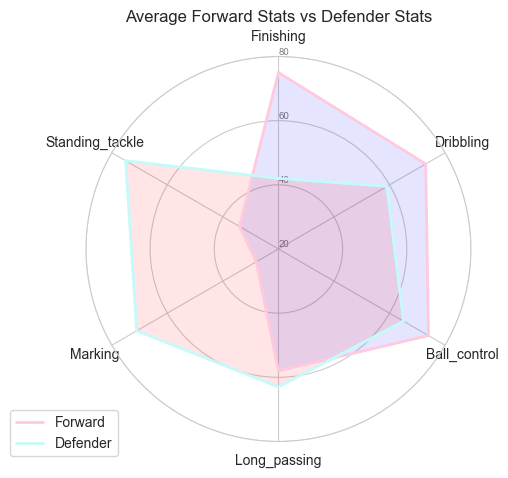

In [175]:
# Stats of focus
stats = ('Finishing', 'Dribbling', 'Ball_control', 'Long_passing', 'Marking', 'Standing_tackle')

# Average values for each stat for Forward players (Finishing > 70)
forward_average = []
for stat in stats:
    query = f"SELECT AVG({stat}) FROM player_df WHERE Finishing > 70;"
    value = int(execute_query(query)[0][0])
    forward_average.append(value)

# Average values for each stat for Defenders (Standing Tackle > 70)
defender_average = []
for stat in stats:
    query = f"SELECT AVG({stat}) FROM player_df WHERE Standing_tackle > 70;"
    value = int(execute_query(query)[0][0])
    defender_average.append(value)

# Create DataFrame
df = pd.DataFrame({
'group': ['Forward','Defender'],
'Finishing': [forward_average[0], defender_average[0]],
'Dribbling': [forward_average[1], defender_average[1]],
'Ball_control': [forward_average[2], defender_average[2]],
'Long_passing': [forward_average[3], defender_average[3]],
'Marking': [forward_average[4], defender_average[4]],
'Standing_tackle': [forward_average[5], defender_average[5]]
})


# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60,80], ["20","40","60","80"], color="grey", size=7)
plt.ylim(20,80)
 

# ------- PART 2: Add plots
 
# Plot each position = each line of the data
 
# Forward Average
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Forward")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Defender Average
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Defender")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Create title
plt.title("Average Forward Stats vs Defender Stats")

# Display plot
plt.show()

>Observations:
>- On average, Forward players are stronger in Finishing, Dribbling, and Ball Control,<br>
>but are weaker in Long Passing, and especially in Standing Tackle and Marking

##### <b>3.2 Dataset Visualisation (Q8)</b>

>Visualisations explored:
>- Distribution of players in the top 10 clubs of Ivory Coast
>- Distribution of clubs in the top 5 countries with the most FIFA 18 players
>- How player Value corresponds to Overall stat in the top 6 countries with the most FIFA 18 players
>- How player Value corresponds to player Age in the top 6 countries with the most FIFA 18 players
>- How player Value corresponds to Dribbling and Standing Tackle stat for Foward players (Finishing > 70)

(Q8.1) Distribution of clubs of Ivory Coast players

In [176]:
# Create temporary DataFrame
df = player_clean_df.loc[player_clean_df['Nationality'] == 'Ivory Coast']['Club'].value_counts()[:10]
data = [[key, value] for key, value in df.to_dict().items()]
df = convert_to_df(data, ['Club', 'Players'])

# Plot pie chart
fig = px.pie(df, values='Players', names='Club', height=600)
fig.show()

>Observations:
>- close to 1/5 of players from Ivory Coast did not belong in a club

(Q8.2) Distribution of clubs in the top 5 countries with the most FIFA 18 players

>Size of each club is determined by the total Overall stats of all players in that club

In [177]:
# Create temporary DataFrame
df = player_clean_df.loc[player_clean_df['Nationality'].isin(['England', 'Germany', 'Spain', 'France', 'Argentina'])]

# Plot sunburts chart
fig = px.sunburst(df, path=['Nationality', 'Club'], values='Overall', color='Nationality', height=600)
fig.show()

(8.3) How player Value corresponds to Overall stat in the top 6 countries with the most FIFA 18 players

In [178]:
# Create temporary DataFrame
df = player_clean_df.loc[player_clean_df['Nationality'].isin(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil'])]

# Plot scatter plot
fig = px.scatter(df, x="Overall", y="Value", color="Nationality", size='Wage', height=600, color_continuous_scale = "darkmint")
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(plot_bgcolor='#fff')
fig.show()

>Observations:
>- The relationship between player Value and their Overall stat appears to increase exponentially
>- The higher the player's value, the higher amount of premium clubs are willing to pay for the player
>- This is likely due to the fact that better performing players are bid by more clubs, pushing their value up

(Q8.4) How player Value corresponds to player Age in the top 6 countries with the most FIFA 18 players

In [179]:
# Create temporary DataFrame
df = player_clean_df.loc[player_clean_df['Nationality'].isin(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil'])]

# Plot scatter plot
fig = px.scatter(df, x="Age", y="Value", color="Nationality", size='Wage', height=600)
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(plot_bgcolor='#fff')
fig.show()

>Observations:
>- The highest valued players appear to center around the age of 25 to 30 years old
>- This suggests that players tend to hit their prime around this age range, and are able to perform at their highest level
>- Beyond that age, they'll start to see their values decrease

>It may be worthwhile to perform this analysis for different positions to see if players in certain positions have earlier peak ages,<br>
especially for aggressive positions like Forwards

(Q8.5) How player Value corresponds to Dribbling and Standing Tackle stat for Foward players (Finishing > 70)

> Is it important for Forward players to have high Dribbling or Standing Tackle stats?<br>
> This may be determined by comparing to their Values

In [180]:
# Create temporary DataFrame
df = player_clean_df.loc[player_clean_df['Finishing'] > 70]

# Plot 3D scatter plot
fig = px.scatter_3d(df, x='Standing tackle', y='Dribbling', z='Value',color="Overall", height=600)
fig.update_traces(marker=dict(size=3, line=dict(width=5, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()

>Observations:
>- It appeas that the Standing Tackle stat may not be an important stat for Forward players as most of them concentrates around the lower end, especially high-valued ones
>- A high Dribbling stat does appear to be important for a Forward player to have, as there is an exponential relationship between player Value and the Dribbling stat

***

### <b>4. Conclusions</b>

In this study, data was taken from a kaggle FIFA 18 dataset to perform Exploratory Data Analysis on FIFA 18 players using MySQL, Pandas, Matplotlib, Seaborn, and Plotly.

>Data cleaning was carried out using Pandas by:
>- Removing redundant columns
>- Addressing missing values
>- Removing symbols in numeric cells
>- Formatting currency
>- Standardizing datatypes
>- Removing duplicates

***